In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
n = 100000
t = np.linspace(0, 20, n)

In [3]:
def f(u, y):
    return -u

def f_damped(u,y):
    return -u-y

In [4]:
def dyn(u0, y0, f, t, alpha=1):
    dt = t[1]-t[0]
    u = u0
    y = y0
    U = []
    Y = []
    for t_ in t:
        y = y + dt*f(alpha*u,y)
        u = u + dt*y
        U += [u]
        Y += [y]
    return U, Y

In [5]:
U1, Y1 = dyn(1,1,f_damped, t)
U2, Y2 = dyn(1,-1,f_damped,t)
U3, Y3 = dyn(-1,1,f_damped,t)
U4, Y4 = dyn(-1,-1,f_damped,t)

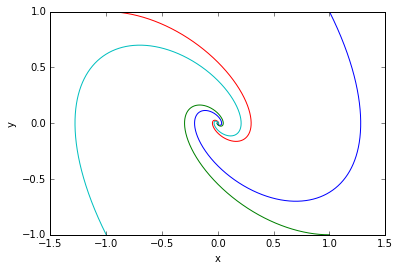

In [6]:
plt.plot(U1, Y1)
plt.plot(U2, Y2)
plt.plot(U3, Y3)
plt.plot(U4, Y4)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('IO/ph-space-damped_harmonic.png')
plt.show()

In [7]:
alpha1=0.1
alpha2=1
alpha3=4
U2, Y2 = dyn(1,-1,f,t, alpha1)
U3, Y3 = dyn(-1,1,f,t, alpha2)
U4, Y4 = dyn(-1,-1,f,t, alpha3)

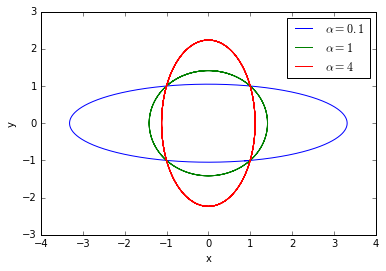

In [8]:
plt.plot(U2, Y2, label=r'$\alpha={}$'.format(str(alpha1)))
plt.plot(U3, Y3, label=r'$\alpha={}$'.format(str(alpha2)))
plt.plot(U4, Y4, label=r'$\alpha={}$'.format(str(alpha3)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('IO/ph-space-harmonic.png')
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
def natural_freq(time, proto_phases):
    try:
        r, c = proto_phases.shape
        ax = 1
        if r > c:
            ax = 0
    except ValueError:
        ax = 0
    proto_phases = np.unwrap(proto_phases)
    freq = (proto_phases[-1] - proto_phases[0])/(time[-1] - time[0])
    return freq # omega_0

In [10]:
# d^2/dt^2  = - omega^2 * x; y(1) = 1; y1(1) = 1
# ->
# dx/dt = y
# dy/dt = y1

In [11]:
def f_vdP(u, y, mu, omega, eta):
    return mu * (1-u**2)*y - omega**2 * u + eta * np.random.normal()

In [12]:
def dyn_vdP(u0, y0, fun, t, mu, omega, eta):
    dt = t[1]-t[0]
    u = u0
    y = y0
    U = []
    Y = []
    for t_ in t:
        y = y + dt*fun(u,y, mu, omega, eta)
        u = u + dt*y
        U += [u]
        Y += [y]
    return U, Y

In [13]:
end = 4000
m = 0.5
om=1.11
eta = 0.05 # szum
t = np.linspace(0, end, end*100)
U, Y = dyn_vdP(0.1,0.1,f_vdP, t, mu=m, omega=om, eta=eta)

In [14]:
t = np.array(t[3000:])
U = np.array(U[3000:])
Y = np.array(Y[3000:])

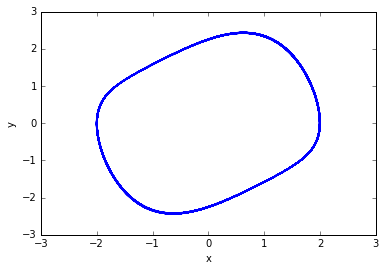

In [15]:
plt.plot(U,Y)#, label=r'$\alpha={}$'.format(str(alpha1)))
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('IO/ph-space-vdp.png')
plt.show()

In [16]:
pph_atan = -np.arctan2(Y, U)

In [29]:
from scipy.signal import hilbert
analytic_signal = hilbert(np.transpose(U))
# cut unstable points due to Hilbert transform

analytic_signal = analytic_signal[500:len(t) - 500]
U = U[500:len(t) - 500]

#t2 = t[500:len(t) - 500]
pph_atan = pph_atan[500:len(t)-500]
t = t[500:len(t) - 500]

analytic_signal = analytic_signal - np.transpose([np.mean(analytic_signal)])
pph_hilbert = np.angle(analytic_signal)

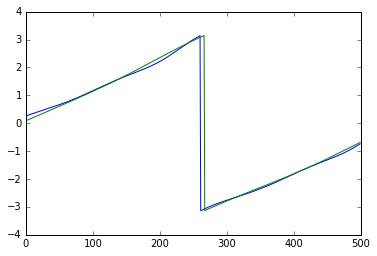

In [18]:
plt.plot(pph_atan[:500])
plt.plot(pph_hilbert[:500])
plt.show()

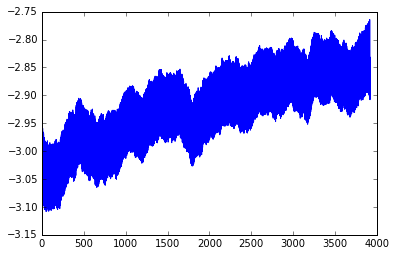

In [31]:
nat_freq = natural_freq(t, pph_atan)
proto_phases = np.unwrap(pph_hilbert)
plt.plot(t - t[0], proto_phases - nat_freq * (t- t[0]))
plt.show()

In [20]:
from coupling_analysis import true_phases

In [21]:
#phases = true_phases(pph_atan)
phases = true_phases(pph_hilbert)

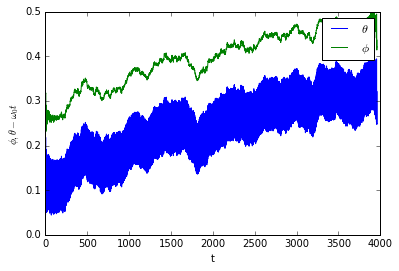

In [24]:
plt.plot(t - t[0], proto_phases - nat_freq * (t- t[0]), 
        label=r"$\theta$")
plt.plot(t - t[0], np.unwrap(phases[0]) - nat_freq * (t- t[0]) + 0.1,
        label=r'$\phi$')
plt.xlabel('t')
plt.ylabel(r"$\phi , \theta - \omega_0 t$")
plt.legend()
plt.savefig("IO/phi_theta_noisy_long.png")
plt.show()